In [ ]:
# import requests

# urls = [
#     "https://huggingface.co/datasets/MLDS-NUS/Experimental_Images/resolve/main/30V_Jan24.pkl",
#     # "https://huggingface.co/datasets/MLDS-NUS/Experimental_Images/resolve/main/60V_Dec24.pkl",  
# ]

# for url in urls:
#     filename = url.split("/")[-1]
#     with open(filename, "wb") as f:
#         f.write(requests.get(url).content)


In [ ]:
import pickle

# 加载 train_data.pkl
with open("60V_Dec24.pkl", "rb") as f:
    data_60 = pickle.load(f)

# if isinstance(data_60, dict):
#     print(data_60.keys())
# print(len(data_60))
# print((data_60["60V_Tra_1"]).shape)

# import numpy as np
# data_60["60V_Tra_46"] = np.delete(
#     data_60["60V_Tra_46"], [-4, -3,-2,-1], axis=0
# )

# data_60["60V_Tra_94"] = np.delete(
#     data_60["60V_Tra_94"], [-6,-5,-4, -3,-2,-1], axis=0
# )

# with open("60V_Dec24_modified.pkl", "wb") as f:
#     pickle.dump(data_60, f)


In [ ]:
if isinstance(data_60, dict):
    print(data_60.keys())
print(len(data_60)) 

dict_keys(['60V_Tra_0', '60V_Tra_1', '60V_Tra_2', '60V_Tra_3', '60V_Tra_4', '60V_Tra_5', '60V_Tra_6', '60V_Tra_7', '60V_Tra_8', '60V_Tra_9', '60V_Tra_10', '60V_Tra_11', '60V_Tra_12', '60V_Tra_13', '60V_Tra_14', '60V_Tra_15', '60V_Tra_16', '60V_Tra_17', '60V_Tra_18', '60V_Tra_19', '60V_Tra_20', '60V_Tra_21', '60V_Tra_22', '60V_Tra_23', '60V_Tra_24', '60V_Tra_25', '60V_Tra_26', '60V_Tra_27', '60V_Tra_28', '60V_Tra_29', '60V_Tra_30', '60V_Tra_31', '60V_Tra_32', '60V_Tra_33', '60V_Tra_34', '60V_Tra_35', '60V_Tra_36', '60V_Tra_37', '60V_Tra_38', '60V_Tra_39', '60V_Tra_40', '60V_Tra_41', '60V_Tra_42', '60V_Tra_43', '60V_Tra_44', '60V_Tra_45', '60V_Tra_46', '60V_Tra_47', '60V_Tra_48', '60V_Tra_49', '60V_Tra_50', '60V_Tra_51', '60V_Tra_52', '60V_Tra_53', '60V_Tra_54', '60V_Tra_55', '60V_Tra_56', '60V_Tra_57', '60V_Tra_58', '60V_Tra_59', '60V_Tra_60', '60V_Tra_61', '60V_Tra_62', '60V_Tra_63', '60V_Tra_64', '60V_Tra_65', '60V_Tra_66', '60V_Tra_67', '60V_Tra_68', '60V_Tra_69', '60V_Tra_70', '60V_

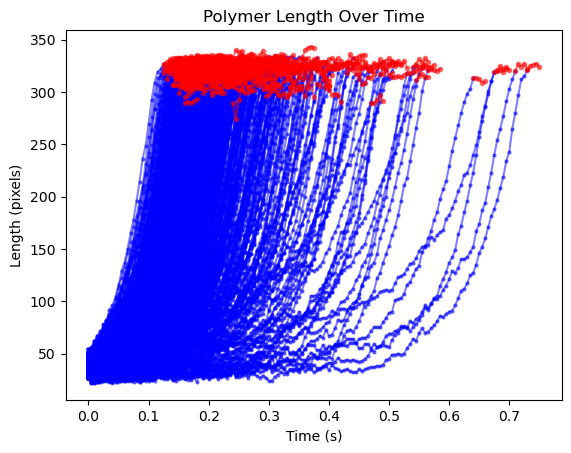

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def find_leftmost_nonzero(image):
    """
    查找黑白图片中最左侧非零元素的位置
    :param image: 2D numpy array, 黑白图片
    :return: 最左侧非零元素的列索引，如果没有非零元素则返回 -1
    """
    # 查找每一列是否有非零元素
    nonzero_columns = np.any(image != 0, axis=0)
    
    # 找到第一个非零元素的列索引
    nonzero_indices = np.where(nonzero_columns)[0]
    
    # 如果没有非零元素，则返回 -1
    if len(nonzero_indices) == 0:
        return -1
    
    return nonzero_indices[0]

def find_rightmost_nonzero(image):
    """
    查找黑白图片中最右侧非零元素的位置
    :param image: 2D numpy array, 黑白图片
    :return: 最右侧非零元素的列索引，如果没有非零元素则返回 -1
    """
    # 查找每一列是否有非零元素
    nonzero_columns = np.any(image != 0, axis=0)
    
    # 找到最后一个非零元素的列索引
    nonzero_indices = np.where(nonzero_columns)[0]
    
    # 如果没有非零元素，则返回 -1
    if len(nonzero_indices) == 0:
        return -1
    
    return nonzero_indices[-1]

def Img2length(data):
    """
    计算一组图片中线条的长度（最右非零列索引 - 最左非零列索引）
    :param data: 3D numpy array, 形状为 (num_images, height, width)
    :return: 包含每个图像线条长度的 numpy 数组
    """
    lengths = []
    rightmost, leftmost=[],[]
    for img in data:
        leftmost_index = find_leftmost_nonzero(img-255)
        rightmost_index = find_rightmost_nonzero(img-255)
        
        # 如果找到有效边界，计算长度；否则设为0
        if leftmost_index != -1 and rightmost_index != -1 and rightmost_index >= leftmost_index:
            lengths.append(rightmost_index - leftmost_index)
        else:
            lengths.append(0)
        rightmost.append(rightmost_index)
        leftmost.append(leftmost_index)
    return np.array(lengths), np.array(rightmost), np.array(leftmost)


for i in range(len(data_60)):
    length, rightmost, leftmost= Img2length(data_60["60V_Tra_"+str(i)])
    t=np.arange(len(length))*0.005
    plt.plot(t[:-4],length[:-4],'bo-', markersize=2, zorder=1, alpha=0.5)
    plt.plot(t[-5:], length[-5:], 'ro-',markersize=3, zorder=2, alpha=0.5)

    plt.xlabel('Time (s)')
    plt.ylabel('Length (pixels)')
    plt.title('Polymer Length Over Time')


In [5]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def discretize_trajectory(trajectory, bin_edges):
    """
    将连续轨迹离散化为多维网格
    
    参数:
        trajectory: (N, dim) 数组，dim维轨迹
        bin_edges: 每个维度的bin边界列表
        
    返回:
        bin_indices: (N, dim) 数组，每个点在多维网格中的索引
    """
    dim = trajectory.shape[1]
    n_bins = [len(edges) - 1 for edges in bin_edges]
    bin_indices = np.zeros_like(trajectory, dtype=int)
    
    for d in range(dim):
        # 将点分配到bin
        bin_indices[:, d] = np.digitize(trajectory[:, d], bin_edges[d]) - 1
        # 确保索引在 [0, n_bins[d]-1] 范围内
        bin_indices[:, d] = np.clip(bin_indices[:, d], 0, n_bins[d] - 1)
    
    return bin_indices

def determine_global_bins(trajectories, n_bins=10):
    """
    根据所有轨迹确定全局bin边界
    
    参数:
        trajectories: 轨迹列表，每个是 (N_i, dim) 数组
        n_bins: 每个维度的bin数量
        
    返回:
        global_bin_edges: 全局bin边界列表
    """
    # if not trajectories:
    #     raise ValueError("轨迹列表不能为空")
    
    # 收集所有轨迹点
    all_points = np.vstack(trajectories)
    dim = all_points.shape[1]
    
    min_vals = np.min(all_points, axis=0)
    max_vals = np.max(all_points, axis=0)
    
    bin_edges = []
    for d in range(dim):
        # 创建bin边界，稍微扩展范围以避免边界点问题
        range_expansion = 0.05 * (max_vals[d] - min_vals[d])
        min_val = min_vals[d] - range_expansion
        max_val = max_vals[d] + range_expansion
        
        edges = np.linspace(min_val, max_val, n_bins + 1)
        bin_edges.append(edges)
    
    return bin_edges

def count_transitions(trajectories, bin_edges):
    """
    统计所有轨迹的转移计数
    
    参数:
        trajectories: 轨迹列表
        bin_edges: 全局bin边界
        
    返回:
        forward_counts_dict: 正向转移计数字典 {(start_index_tuple): {end_index_tuple: count}}
        reverse_counts_dict: 反向转移计数字典 {(start_index_tuple): {end_index_tuple: count}}
        total_transitions: 总转移次数
    """
    dim = len(bin_edges)
    forward_counts = {}
    reverse_counts = {}
    total_transitions = 0
    
    # 遍历所有轨迹
    for traj_idx, trajectory in enumerate(tqdm(trajectories, desc="处理轨迹")):
        # 离散化当前轨迹
        bin_indices = discretize_trajectory(trajectory, bin_edges)
        n_points = bin_indices.shape[0]
        
        # 统计当前轨迹的转移
        for k in range(n_points - 1):
            # 获取当前状态和下一状态的索引元组
            start_idx = tuple(bin_indices[k])
            end_idx = tuple(bin_indices[k+1])
            
            # 正向转移计数
            if start_idx not in forward_counts:
                forward_counts[start_idx] = {}
            if end_idx not in forward_counts[start_idx]:
                forward_counts[start_idx][end_idx] = 0
            forward_counts[start_idx][end_idx] += 1
            
            # 反向转移计数 (时间反演)
            if end_idx not in reverse_counts:
                reverse_counts[end_idx] = {}
            if start_idx not in reverse_counts[end_idx]:
                reverse_counts[end_idx][start_idx] = 0
            reverse_counts[end_idx][start_idx] += 1
            
            total_transitions += 1
    
    return forward_counts, reverse_counts, total_transitions

def calculate_transition_probabilities(counts_dict):
    """
    计算转移概率
    
    参数:
        counts_dict: 转移计数字典
        
    返回:
        probs_dict: 转移概率字典 {(start_idx): {end_idx: probability}}
    """
    probs_dict = {}
    
    for start_idx, end_counts in counts_dict.items():
        total = sum(end_counts.values())
        probs_dict[start_idx] = {}
        
        for end_idx, count in end_counts.items():
            probs_dict[start_idx][end_idx] = count / total
    
    return probs_dict

def estimate_epr_with_counting(trajectories, dt, n_bins=8, max_irreversible=10.0):
    """
    使用直方图计数方法估计熵产生率（通用维度版本）
    
    参数:
        trajectories: 轨迹列表，每个是 (N_i, dim) 数组
        dt: 时间步长
        n_bins: 每个维度的bin数量
        max_irreversible: 完全不可逆转移的KL贡献最大值
        
    返回:
        ep_rate: 估计的熵产生率
        kl_contributions: 所有转移的KL贡献列表（用于诊断）
    """
    # 0. 获取系统维度
    dim = trajectories[0].shape[1]
    print(f"系统维度: {dim}D, 每个维度使用 {n_bins} bins")
    
    # 1. 确定全局bin边界
    bin_edges = determine_global_bins(trajectories, n_bins)
    print(f"Bin边界已确定") 
    
    # 2. 统计所有轨迹的转移
    forward_counts, reverse_counts, total_transitions = count_transitions(trajectories, bin_edges)
    print(f"总转移次数: {total_transitions}")
    print(total_transitions)
    
    # 3. 计算正向转移概率
    forward_probs = calculate_transition_probabilities(forward_counts)

    # 4. 计算反向转移概率
    reverse_probs = calculate_transition_probabilities(reverse_counts)
    
    # 5. 计算每个转移的相对熵贡献
    kl_contributions = []
    valid_transitions = 0
    irreversible_transitions = 0
    
    # 遍历所有正向转移

        #获取最小反向概率
    min_val = min(
        prob
        for inner in reverse_probs.values()
        for prob in inner.values()
        if prob > 0
    )
    print('min', min_val)
    for start_idx, end_dict in tqdm(forward_counts.items(), desc="计算KL散度"):
        for end_idx, count in end_dict.items():
            # 获取正向概率
            p_forward = forward_probs[start_idx][end_idx]
            
            # 获取反向概率 - 注意方向反转
            p_reverse = 0.0 
            if end_idx in reverse_probs.get(start_idx, {}):
                p_reverse = reverse_probs[start_idx][end_idx] 
            # if start_idx in reverse_probs.get(end_idx, {}):
            #     p_reverse = reverse_probs[end_idx][start_idx]
            
            # 计算KL贡献
            if p_reverse > 0:
                log_ratio = np.log(p_forward / p_reverse)
            else:
                # 完全不可逆转移
                log_ratio = np.log(p_forward /min_val* max_irreversible)
                irreversible_transitions += count
            
            # 对该转移的每次出现累加贡献
            kl_contributions.extend([log_ratio] * count)
            valid_transitions += count
    
    # 6. 计算平均相对熵
    if valid_transitions > 0:
        H = np.mean(kl_contributions)
    else:
        H = 0.0
        print("警告: 未找到有效转移!")
    
    # 7. 计算熵产生率
    ep_rate = H / dt
    
    print(f"有效转移: {valid_transitions}/{total_transitions} ({100*valid_transitions/total_transitions:.1f}%)")
    print(f"完全不可逆转移: {irreversible_transitions} ({100*irreversible_transitions/total_transitions:.1f}%)")
    print(f"平均相对熵 H: {H:.6f}")
    print(f"估计的熵产生率: {ep_rate:.4f}")
    
    return ep_rate, kl_contributions

系统维度: 2D, 每个维度使用 100 bins
Bin边界已确定


处理轨迹: 100%|██████████| 534/534 [00:00<00:00, 19146.83it/s]


总转移次数: 2136
2136
min 0.037037037037037035


计算KL散度: 100%|██████████| 581/581 [00:00<00:00, 190516.04it/s]

有效转移: 2136/2136 (100.0%)
完全不可逆转移: 1893 (88.6%)
平均相对熵 H: 3.570469
估计的熵产生率: 71.4094


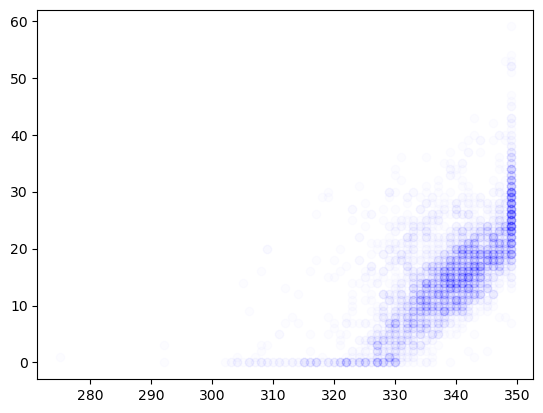

In [ ]:
traj_60=[]
for key in data_60.keys():
    length, rightmost, leftmost= Img2length(data_60[key])
    traj_60.append((np.vstack((rightmost, leftmost)).T)[-5:])

#Delete data beyond the image range    
new_traj = [arr for arr in traj_60 if not (np.any(arr == 350) or np.any(arr == 0))]
ep_rate, kl_contributions = estimate_epr_with_counting(
        trajectories=new_traj,
        dt=0.05,
        n_bins=100
    )

i=1
for i in range(len(data_60)):
    plt.scatter(traj_60[i][:,0],traj_60[i][:,1], alpha=0.01, c='b')

In [15]:
new_traj = [arr for arr in traj_60 if not (np.any(arr == 350) or np.any(arr == 0))]

# 如果你想查看结果，可以打印出来
print(len(new_traj))  # 查看新列表的长度
print(len(traj_60))
print(new_traj[0]) 

534
605
[[344  19]
 [342  17]
 [347  19]
 [349  24]
 [349  23]]
